In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget
import tessreduce as tr

|   Sector | Covers   |   Time difference  |
|          |          |             (days) |
|----------+----------+--------------------|
|       14 | False    |               -108 |
|       15 | False    |                -81 |
|       16 | False    |                -55 |
|       17 | False    |                -29 |
|       18 | False    |                 -4 |
|       21 | False    |                 51 |
|       24 | False    |                137 |
|       41 | False    |                600 |
|       47 | False    |                760 |
|       48 | False    |                789 |
|       51 | False    |                873 |
|       54 | False    |                951 |
|       55 | False    |                978 |
|       56 | False    |               1005 |
|       57 | False    |               1034 |
|       58 | False    |               1063 |
|       60 | False    |               1118 |
getting TPF from TESScut
made reference
7
!!!WARNING!!! mask is too dense, lowering mask_scale to 0.

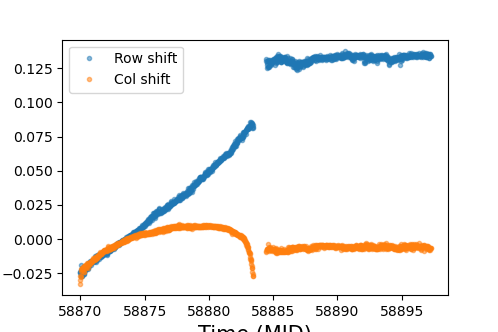

!!Re-running for difference image!!
shifting images
7
!!!WARNING!!! mask is too dense, lowering mask_scale to 0.5, and raising maglim to 15. Background quality will be reduced.
7
remade mask
background
Background correlation correction
Field calibration
Target is above -30 dec, calibrating to PS1 photometry.


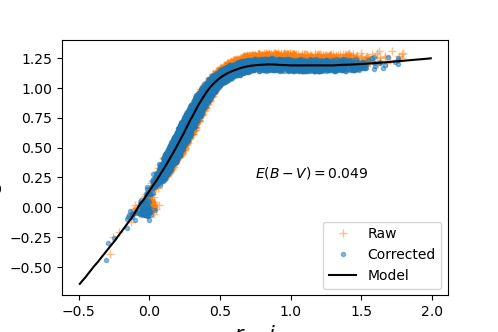

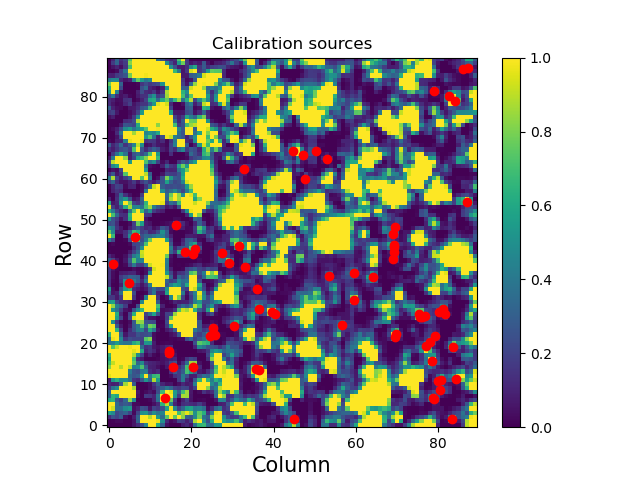

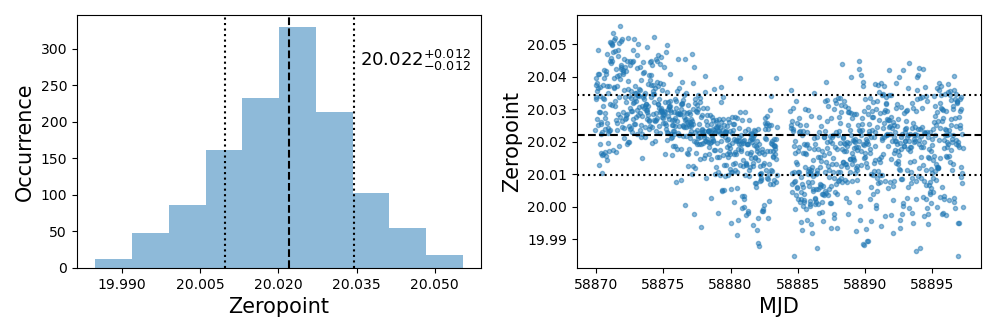

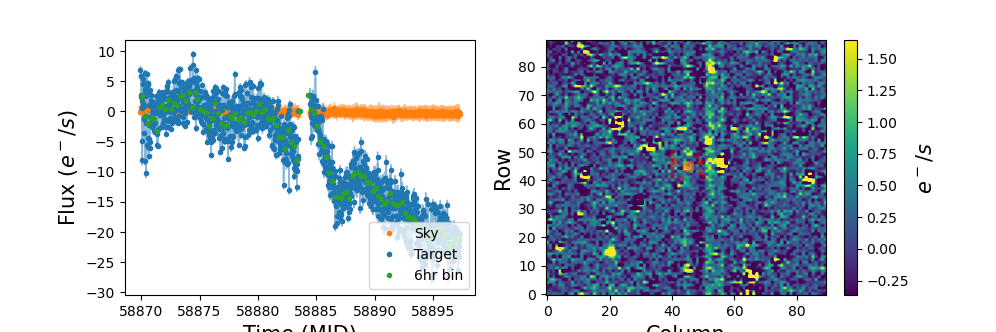

In [2]:
obs = tr.sn_lookup('sn2019vxm')
t = tr.tessreduce(obs_list=obs[5],reduce=True,align=True,diff=True,calibrate=True,plot=True)

In [3]:
sky = ((t.mask & 1)+1 ==1) * 1.
sky[sky==0] = np.nan

In [4]:
masked = t.tpf.flux[t.ref_ind].value*sky

In [5]:
med = np.nanmean(masked)
std = np.nanstd(masked)

In [6]:
med

72.66612303270489

In [7]:
m2 = (masked > med).astype(int)

sky2 = sky.copy()
sky2[m2] = np.nan

In [8]:
t.mask | m2

array([[1, 1, 1, ..., 1, 0, 0],
       [1, 1, 1, ..., 1, 1, 0],
       [1, 1, 1, ..., 1, 1, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

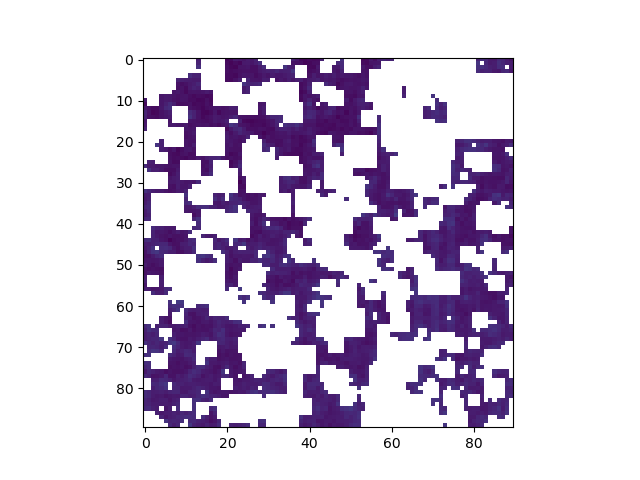

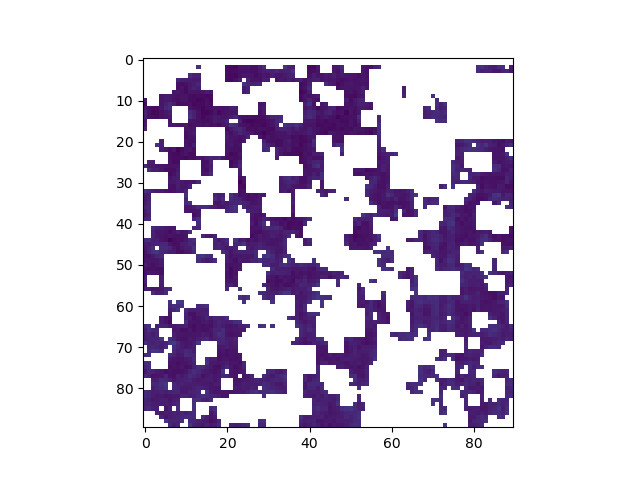

In [9]:
plt.figure()
plt.imshow(t.tpf.flux[t.ref_ind].value*sky,vmax=100)

plt.figure()
plt.imshow(t.tpf.flux[t.ref_ind].value*sky2,vmax=100)

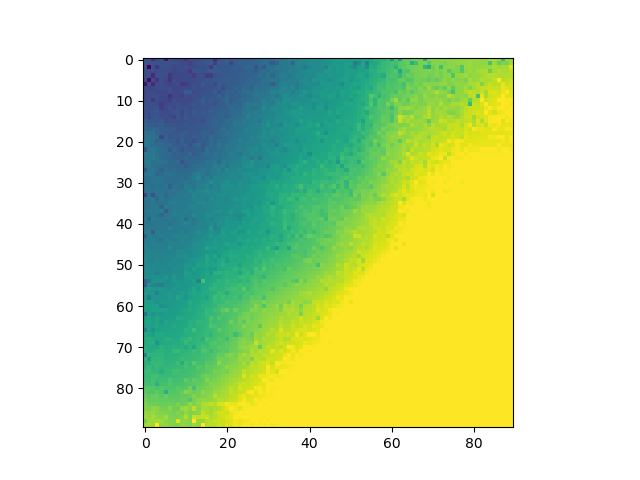

In [8]:
plt.figure()
plt.imshow(t.bkg[100],vmax=115)

made reference
7
made source mask
calculating background
background subtracted
calculating centroids


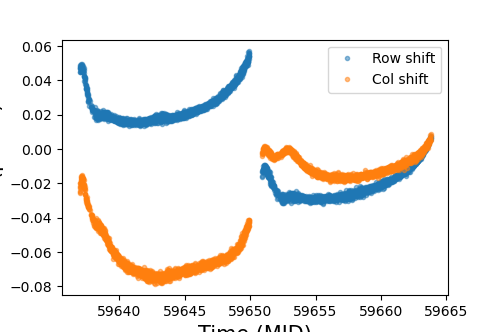

!!Re-running for difference image!!
shifting images
7
remade mask
background
Background correlation correction
Field calibration
Target is above -30 dec, calibrating to PS1 photometry.


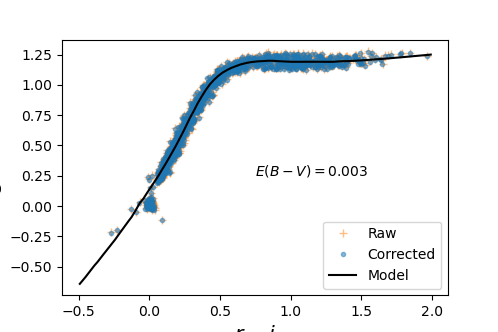

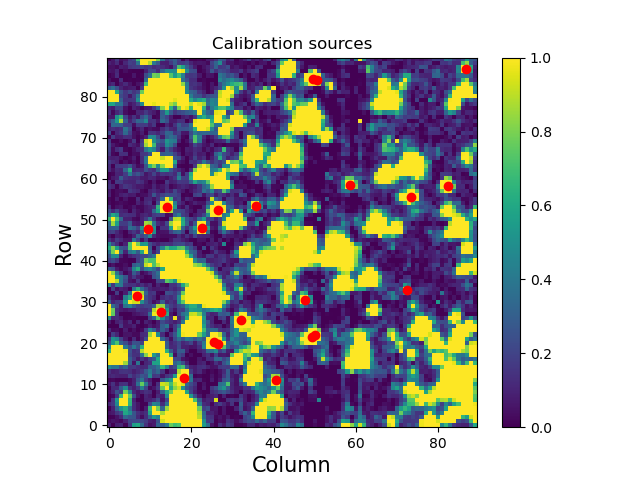

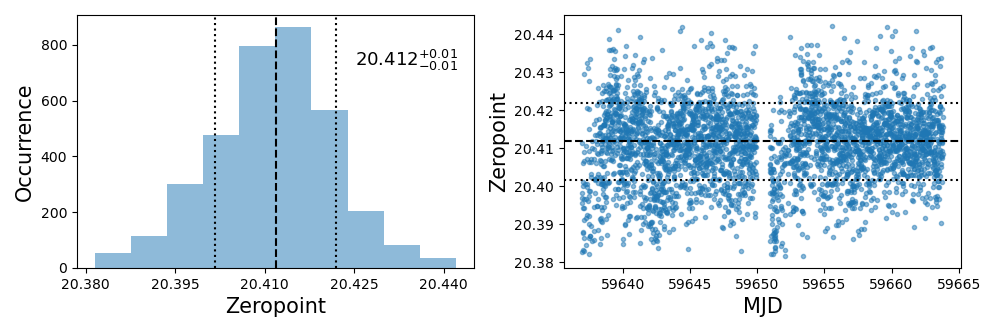

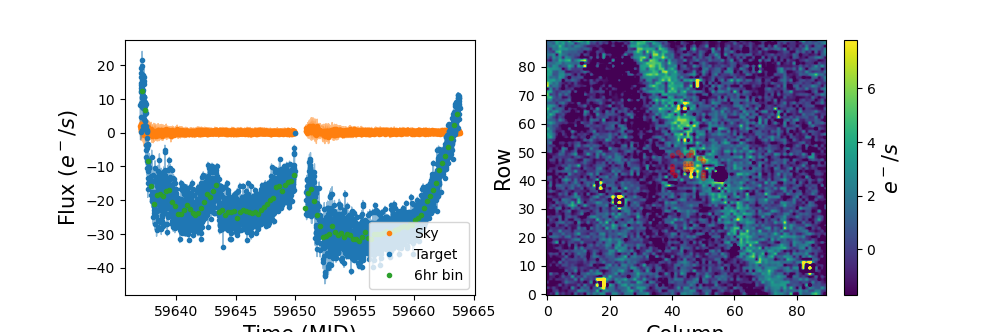

In [13]:
file = '/Users/rri38/Documents/work/data/tess/sn2022eyw_49.fits'
t = tr.tessreduce(tpf=file,reduce=True,align=True,diff=True,calibrate=True,plot=True,corr_correction=True)

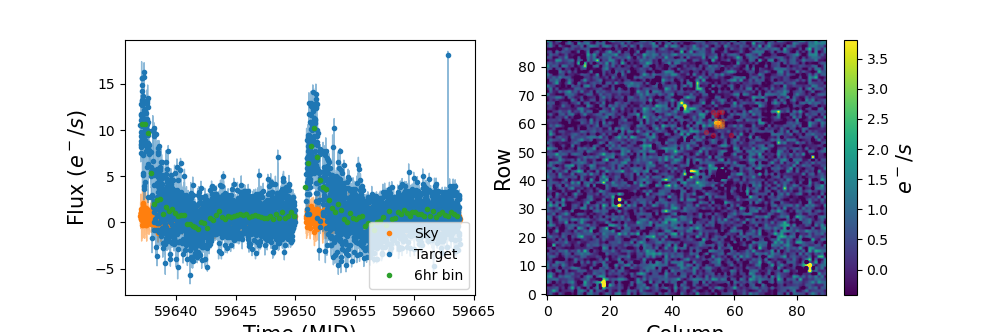

(array([[ 5.96369787e+04,  5.96369856e+04,  5.96369926e+04, ...,
          5.96637978e+04,  5.96638048e+04,  5.96638117e+04],
        [ 1.05205060e+01,  8.78029635e+00,  9.33236482e+00, ...,
          2.91237544e+00, -1.84802710e+00, -2.35818416e+00],
        [ 8.23022876e-01,  7.73742464e-01,  1.24606865e+00, ...,
          5.97496587e-01,  7.31772806e-01,  4.64799837e-01]]),
 array([[5.96369787e+04, 5.96369856e+04, 5.96369926e+04, ...,
         5.96637978e+04, 5.96638048e+04, 5.96638117e+04],
        [6.43002112e-01, 9.85602847e-01, 9.90583332e-01, ...,
         2.12173938e-01, 5.87242224e-01, 4.14162176e-01],
        [8.23022876e-01, 7.73742464e-01, 1.24606865e+00, ...,
         5.97496587e-01, 7.31772806e-01, 4.64799837e-01]]))

In [24]:
t.diff_lc(x=55,y=60)

In [12]:
t.wcs.all_pix2world(55,42,0)


[array(191.08167209), array(62.28952372)]

In [15]:
obs = tr.spacetime_lookup(191.08167209,62.28952372)

!!! WARNING no MJD time specified, using default of 59000
|   Sector | Covers   |   Time difference  |
|          |          |             (days) |
|----------+----------+--------------------|
|       14 | False    |               -290 |
|       15 | False    |               -263 |
|       21 | False    |               -103 |
|       22 | False    |                -74 |
|       48 | False    |                607 |
|       49 | False    |                636 |


getting TPF from TESScut
made reference
7
made source mask
calculating background
background subtracted
calculating centroids


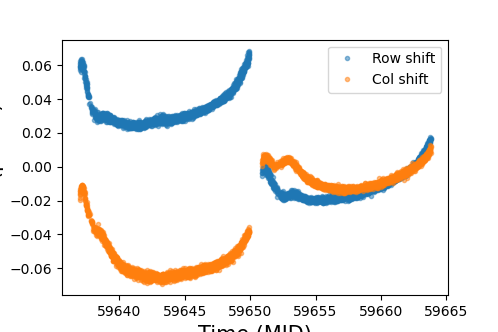

!!Re-running for difference image!!
shifting images
7
remade mask
background
Background correlation correction
Field calibration
Target is above -30 dec, calibrating to PS1 photometry.


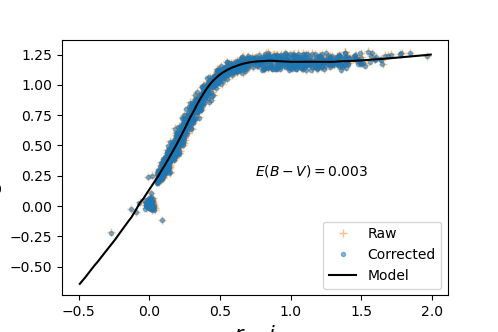

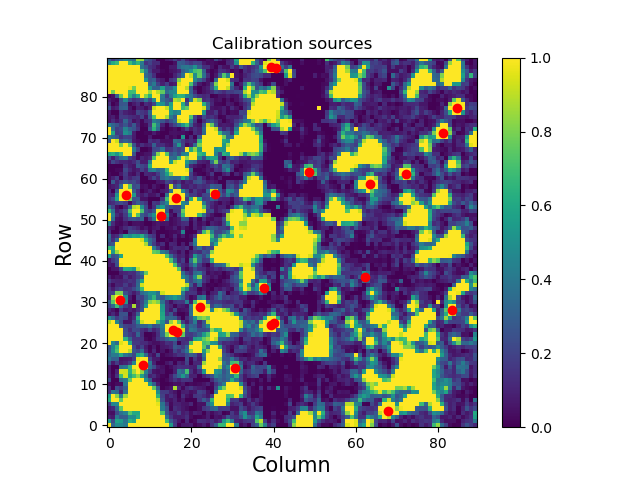

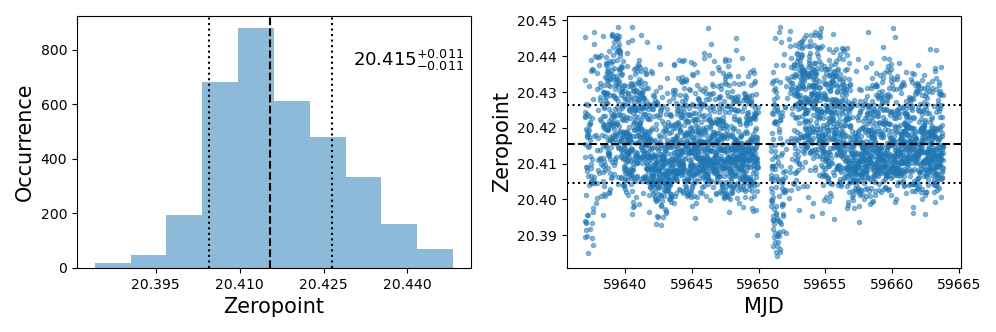

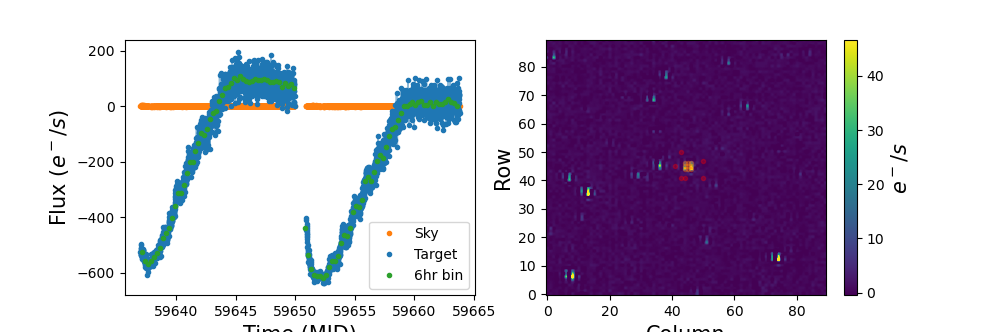

In [22]:
eh = tr.tessreduce(obs_list=obs[-1],reduce=True,plot=True,corr_correction=True)

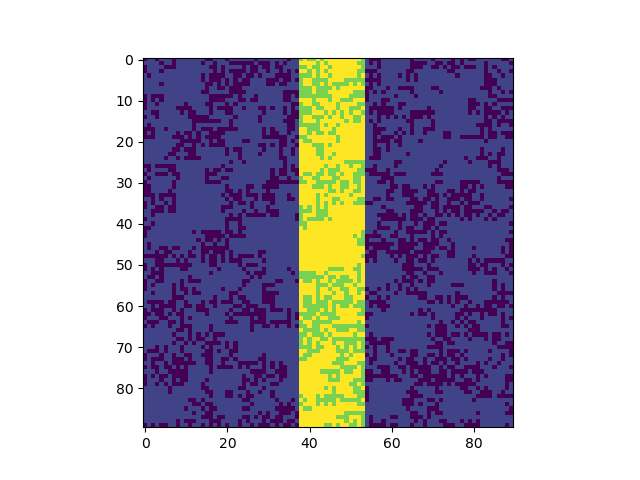

In [21]:
plt.figure()
plt.imshow(eh.mask)

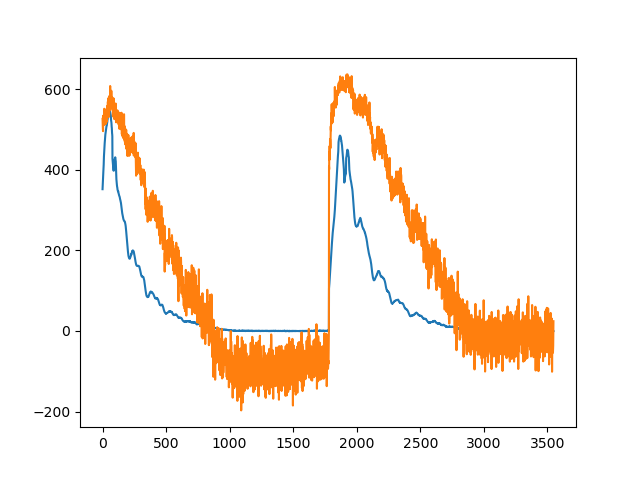

In [20]:
plt.figure()
plt.plot(eh.bkg[:,45,45])
plt.plot(-eh.lc[1])

In [76]:
ax,y = t.wcs.all_world2pix(t.cat.RAJ2000.values,t.cat.DEJ2000.values,0)
t.cat['x'] = x
t.cat['y'] = y

In [98]:
bx, by = t.wcs.all_world2pix(202.642,50.953,0)

In [6]:
sources = ((t.mask & 1) ==1) * 1.
sources[sources==0] = np.nan

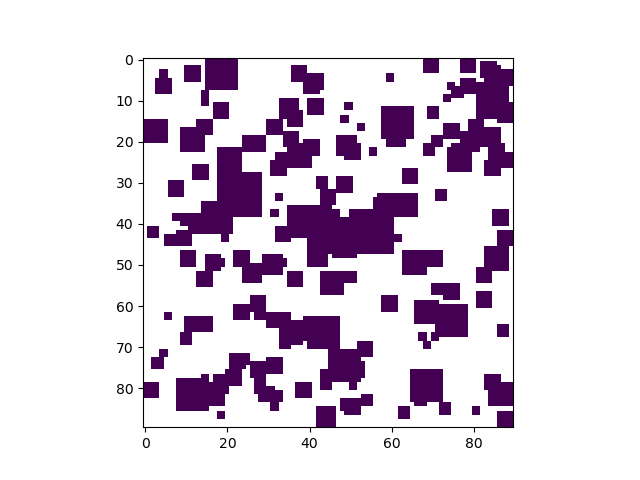

In [7]:
plt.figure()
plt.imshow(sources)

In [77]:
dmag = 2
d_lim = 2
mags = t.cat['rmag'].values
dmags = mags[:,np.newaxis] - mags[np.newaxis,:]
ind = dmags > dmag

dy = abs(y[:,np.newaxis] - y[np.newaxis,:])
dy[dy==0] = 1e3
dy[ind] = 1e3

dx = abs(x[:,np.newaxis] - x[np.newaxis,:])
dx[dx==0] = 1e3
dx[ind] = 1e3

dist = np.sqrt(dx**2 + dy**2)


isoind = (np.nanmin(dist,axis=0) > d_lim) & (mags < 16) & (mags > 14)

ind = ((t.cat['x'].values.astype(int) < t.ref.shape[1]) & 
        (t.cat['y'].values.astype(int) < t.ref.shape[0]) & 
        (t.cat['x'].values.astype(int) > 0) & 
        (t.cat['y'].values.astype(int) > 0))

t.cat['cal_source'] = 0 
t.cat['cal_source'].iloc[isoind & ind] = 1

In [78]:
cals = t.cat.iloc[t.cat.cal_source.values == 1]

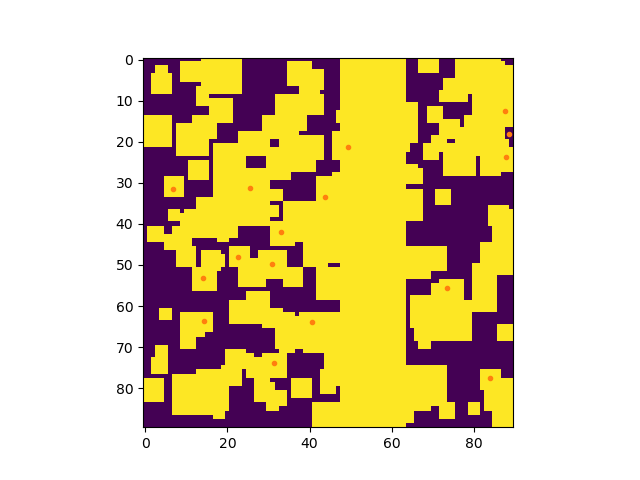

In [81]:
plt.figure()
#plt.imshow(t.ref,vmax=50)
plt.imshow(t.mask,vmax=1)
plt.plot(cals.x,cals.y,'C1.')

In [5]:
from photutils import DAOStarFinder
from astropy.stats import sigma_clipped_stats

In [6]:
mean, med, std = sigma_clipped_stats(t.ref, sigma=3.0)
daofind = DAOStarFinder(fwhm=2.0, threshold=10.*std,exclude_border=True)
s = daofind(t.ref - med)

In [7]:
s[1]

<Row index=1>
  id      xcentroid          ycentroid         sharpness           roundness1          roundness2      npix   sky         peak              flux               mag        
int64      float64            float64           float64             float64             float64       int64 float64     float64           float64            float64      
----- ------------------ ----------------- ------------------ ------------------- ------------------- ----- ------- ---------------- ------------------ ------------------
    2 36.963504317284986 3.204343245168053 0.7958163590873868 0.03339804028474889 0.13882423760410045    25     0.0 62.7706702436825 1.8262086070025914 -0.653875963246925

In [27]:
len(s)

61

In [22]:
s

NameError: name 's' is not defined

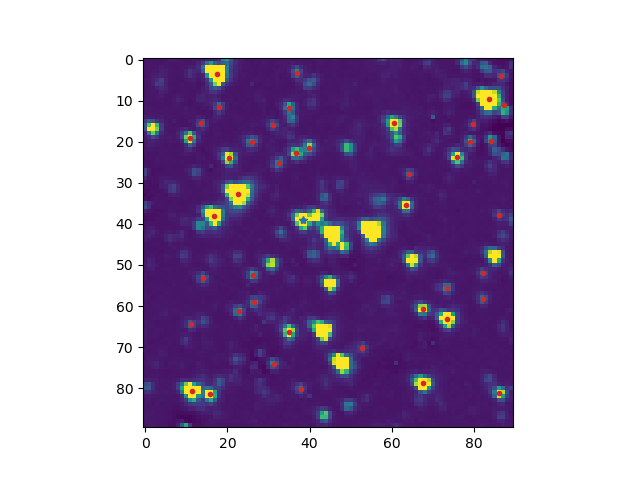

In [42]:
plt.figure()
plt.imshow(t.ref,vmax=150)
#plt.plot(cals.x,cals.y,'C1.')
plt.plot(sources['xcentroid'],sources['ycentroid'],'C3.')
plt.plot(sources.xcentroid[25],sources.ycentroid[25],'*')

In [27]:
sources = t._dat_sources

In [28]:
sources

id  xcentroid  ycentroid  sharpness  roundness1  roundness2  npix  sky  \
0    1  17.427614   3.462217   0.666352    0.564526    0.028283    25  0.0   
1    2  36.963504   3.204343   0.795816    0.033398    0.138824    25  0.0   
2    3  86.644755   3.859947   0.694476    0.194920   -0.160775    25  0.0   
3    5  83.597383   9.638945   0.715849   -0.291641   -0.076431    25  0.0   
4    6  17.966589  11.531416   0.716693    0.278936    0.326156    25  0.0   
5    7  35.097016  11.814790   0.779423    0.768667    0.461354    25  0.0   
6    8  87.244721  11.007848   0.736945   -0.963170    0.112581    25  0.0   
7    9  13.660109  15.524345   0.641385    0.744738    0.309341    25  0.0   
8   10  31.198043  15.939821   0.763457    0.528729    0.024201    25  0.0   
9   11  60.570807  15.492847   0.623095    0.483218    0.137094    25  0.0   
10  12  79.776411  15.781825   0.760105    0.352507    0.170239    25  0.0   
11  13  10.909699  19.126900   0.801265    0.159881    0.103250    25  0.0   
12  14  84.164689  19.711780   0.764091    0.603944    0.325237    25  0.0   
13  15  25.889816  20.086267   0.696937   -0.407406   -0.220654    25  0.0   
14  16  79.079054  20.076358   0.777247    0.493693    0.146119    25  0.0   
15  17  39.762456  21.449703   0.797740   -0.303203    0.151502    25  0.0   
16  19  36.797963  22.691172   0.610491   -0.289750   -0.493964    25  0.0   
17  20  20.436421  23.903587   0.722936    0.046290   -0.047508    25  0.0   
18  21  75.906854  23.789386   0.765085    0.304489    0.140412    25  0.0   
19  22  32.461440  25.251543   0.691207    0.255961    0.172618    25  0.0   
20  23  64.316534  27.935306   0.747258    0.157285    0.040029    25  0.0   
21  24  22.643893  32.646212   0.670148    0.310174    0.049009    25  0.0   
22  25  63.459776  35.468770   0.668205    0.564766   -0.001829    25  0.0   
23  26  16.696986  37.961324   0.759445    0.050470   -0.010461    25  0.0   
24  28  86.132760  37.861904   0.766099    0.114774   -0.043507    25  0.0   
25  29  38.381275  39.044723   0.730737    0.239899   -0.056353    25  0.0   
26  39  26.273335  52.506656   0.733516    0.696081    0.115764    25  0.0   
27  40  82.288514  51.975092   0.785274    0.942024    0.030813    25  0.0   
28  41  14.013579  53.216976   0.795914    0.265269    0.102018    25  0.0   
29  43  73.516209  55.692502   0.719366   -0.305305   -0.190021    25  0.0   
30  44  82.222991  58.244957   0.764475    0.329658    0.092870    25  0.0   
31  45  26.593564  59.134576   0.724095   -0.403111   -0.276021    25  0.0   
32  46  22.761610  61.248807   0.792337    0.091452    0.083760    25  0.0   
33  47  67.561113  60.678122   0.723936   -0.309277   -0.098235    25  0.0   
34  48  73.402282  63.150731   0.731651   -0.329852   -0.183196    25  0.0   
35  49  11.254872  64.439350   0.745267    0.055292    0.162968    25  0.0   
36  50  35.003055  66.254901   0.804089    0.268180    0.157464    25  0.0   
37  52  52.837278  70.156300   0.794278    0.244869   -0.000707    25  0.0   
38  53  31.235922  74.065501   0.778426    0.303992    0.059028    25  0.0   
39  55  67.546294  78.650377   0.738798   -0.281947   -0.096961    25  0.0   
40  56  37.826840  80.078990   0.800322    0.181260    0.007619    25  0.0   
41  57  11.286221  80.586740   0.742649    0.012321    0.131979    25  0.0   
42  58  86.232394  81.190582   0.762364    0.279489    0.048705    25  0.0   
43  59  15.738121  81.482398   0.662618   -0.077184    0.164076    25  0.0   

           peak        flux       mag  
0   2866.987724   87.569287 -4.855880  
1     62.770670    1.826209 -0.653876  
2     37.250150    1.157532 -0.158832  
3   3389.542759   97.215048 -4.969334  
4     48.854651    1.515879 -0.451662  
5    118.714819    3.311009 -1.299901  
6     93.716277    2.430736 -0.964344  
7     30.285116    1.007484 -0.008095  
8     45.027897    1.392424 -0.359428  
9    393.367912   12.053256 -2.702761  
10    33.282428    1.071182 -0.074658  
11   261.3646

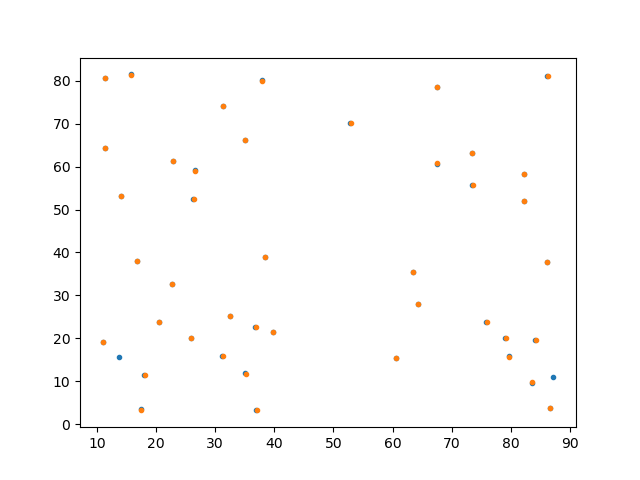

In [31]:
plt.figure()
plt.plot(sources.xcentroid,sources.ycentroid,'.')
plt.plot(sources.xcentroid+shifts[100,0,:],sources.ycentroid+shifts[100,1,:],'.')

In [3]:
shifts = t.raw_shifts.copy()

In [4]:
shifts.shape

(3549, 2, 44)

In [15]:
ars = np.argsort(t._dat_sources['flux'].values)

In [9]:
shifts[abs(shifts) > .2] = np.nan

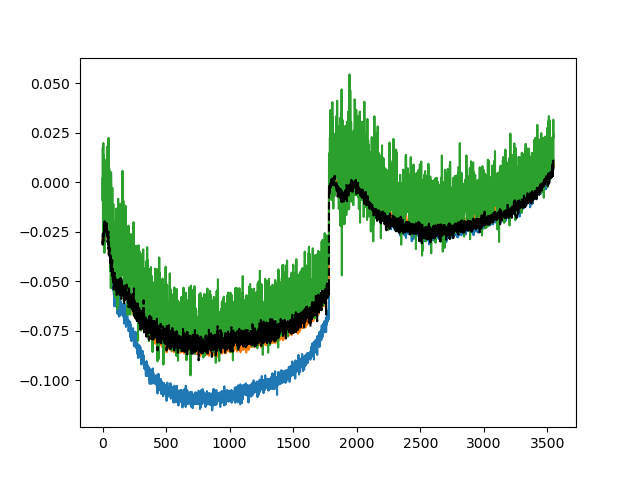

In [54]:
plt.figure()
#for i in range(len(ars)):
plt.plot(shifts[:,1,mins[0]])
plt.plot(shifts[:,1,mins[1]])
plt.plot(shifts[:,1,mins[20]])
    
plt.plot(ms[:,1],'k--')

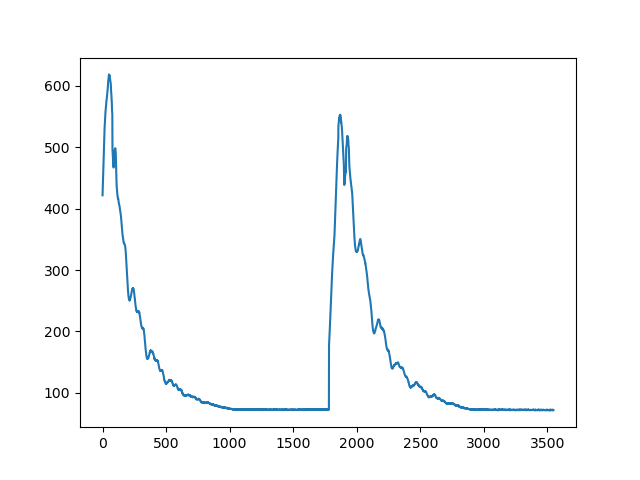

In [51]:
plt.figure()
plt.plot(t.bkg[:,45,45])

In [36]:
test = np.nanstd(shifts[500:1000,0,:]-np.nanmedian(shifts[500:1000,0,:],axis=0),axis=0)

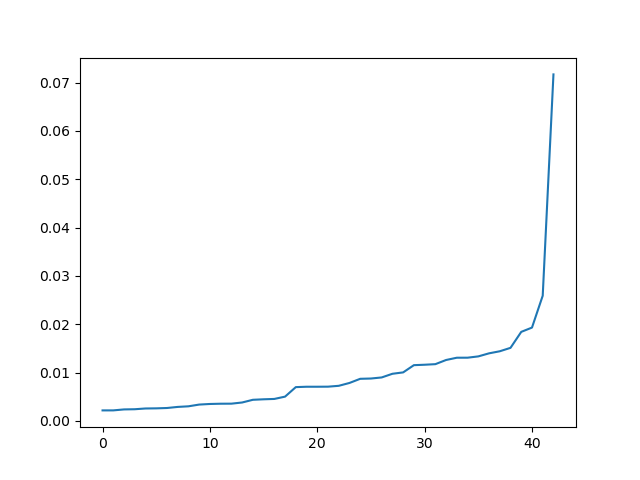

In [104]:
plt.figure()
plt.plot(test[mins])

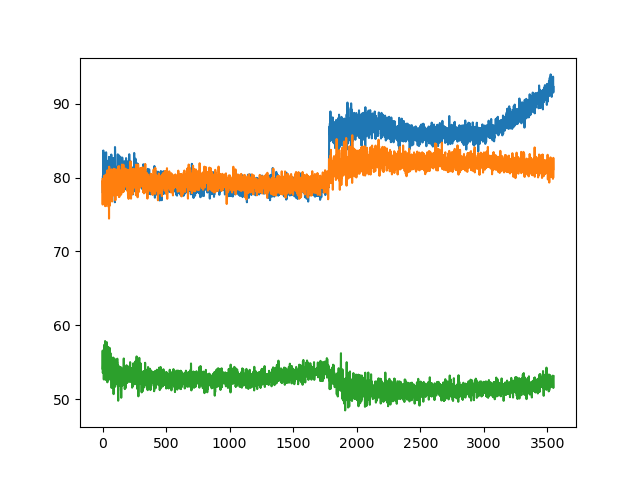

In [101]:
plt.figure()
plt.plot(t.tpf.flux[:,45,45].value - t.bkg[:,45,45])

plt.plot(t.flux[:,14,60])

#plt.plot(t.flux[:,45,45])
plt.plot(t.flux[:,68,35])

In [47]:
mins = np.argsort(test)

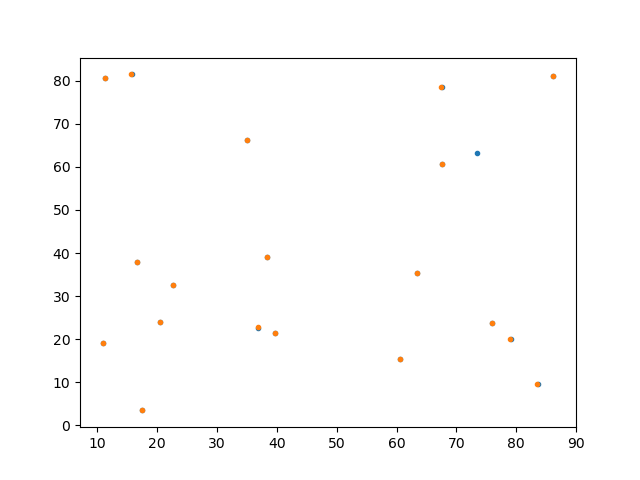

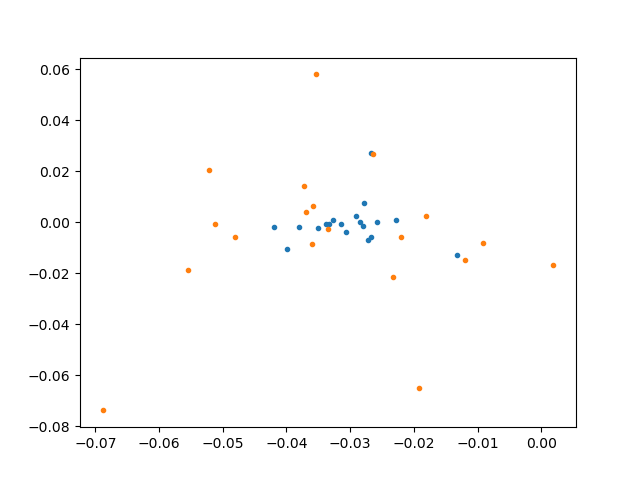

In [109]:
plt.figure()
plt.plot(sources.xcentroid[mins[:20]],sources.ycentroid[mins[:20]],'.')
plt.plot((sources.xcentroid+shifts[2000,0,:])[mins[:20]],(sources.ycentroid+shifts[2000,1,:])[mins[:20]],'.')

plt.figure()
plt.plot(shifts[2000,0,:][mins[:20]],shifts[2000,1,:][mins[:20]],'.')
plt.plot(shifts[2000,0,:][mins[20:40]],shifts[2000,1,:][mins[20:40]],'.')

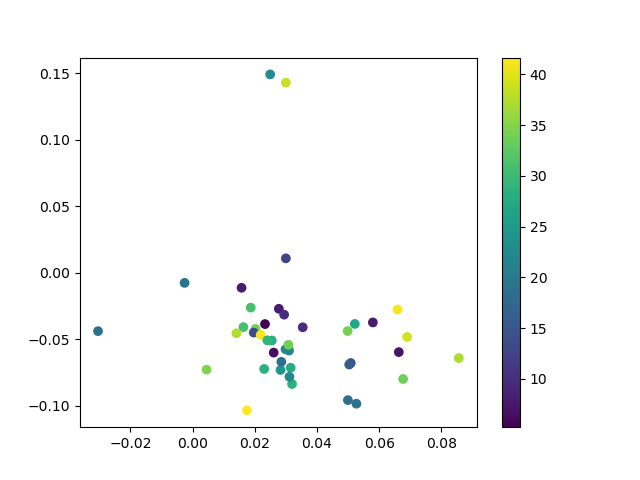

In [121]:
i = 100
dc = np.sqrt((sources.xcentroid-45)**2)#+(sources.ycentroid-45)**2)
plt.figure()
plt.scatter(shifts[i,0,:],shifts[i,1,:],c=dc)
#plt.plot(shifts[i,0,:][mins[20:40]],shifts[i,1,:][mins[20:40]],'.')
plt.colorbar()


Text(0.5, 0.5, 'dy')

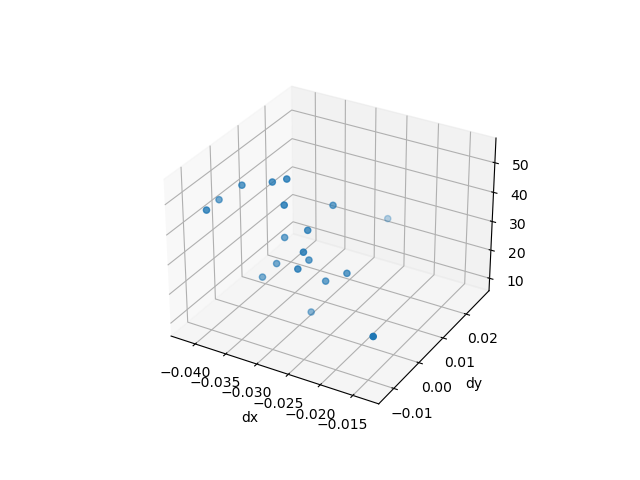

In [129]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(shifts[2000,0,:][mins[:20]],shifts[2000,1,:][mins[:20]], dc[mins[:20]])#sources.xcentroid)

plt.xlabel('dx')
plt.ylabel('dy')
#plt.zlabel('z')

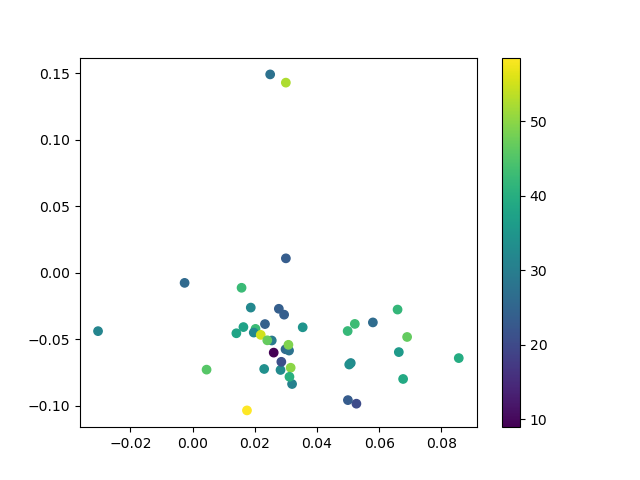

In [130]:
i = 100
dc = np.sqrt((sources.xcentroid-45)**2+(sources.ycentroid-45)**2)
plt.figure()
plt.scatter(shifts[i,0,:],shifts[i,1,:],c=dc)
#plt.plot(shifts[i,0,:][mins[20:40]],shifts[i,1,:][mins[20:40]],'.')
plt.colorbar()

In [197]:
from scipy.signal import savgol_filter

0.0256302895729509


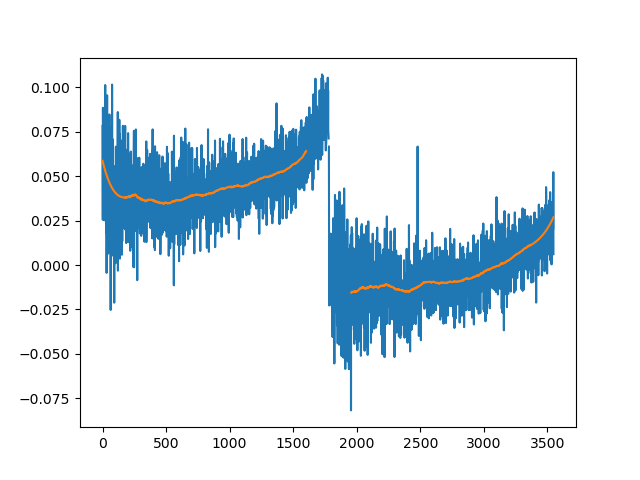

In [213]:
j = 8
b = len(shifts[:,0,0]) // 10
if b/2 == b//2: b += 1
eh = savgol_filter(shifts[:,0,j],b,3)
print(np.nanstd(eh))
plt.figure()
plt.plot(shifts[:,0,j])
plt.plot(eh)

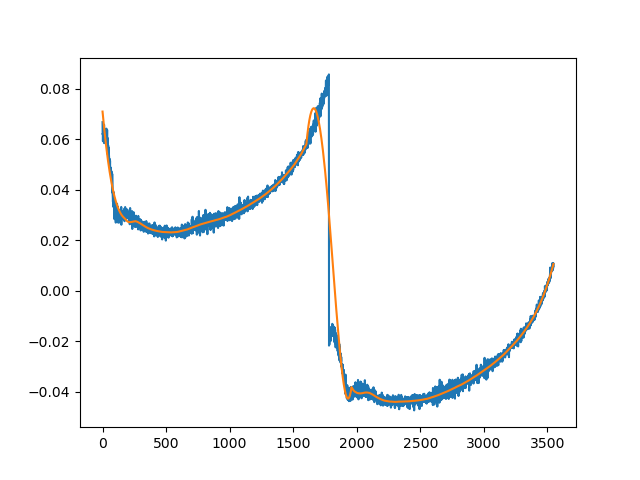

In [199]:
b

355

In [191]:
std = np.nanstd(shifts,axis=0)

mins2 = np.argsort(np.nansum(std,axis=0))

In [193]:
t.shift

array([[ 0.05827047, -0.02980228],
       [ 0.05707357, -0.02964549],
       [ 0.05615859, -0.02939833],
       ...,
       [ 0.00830547,  0.00661316],
       [ 0.00845229,  0.00674597],
       [ 0.00861412,  0.00685572]])

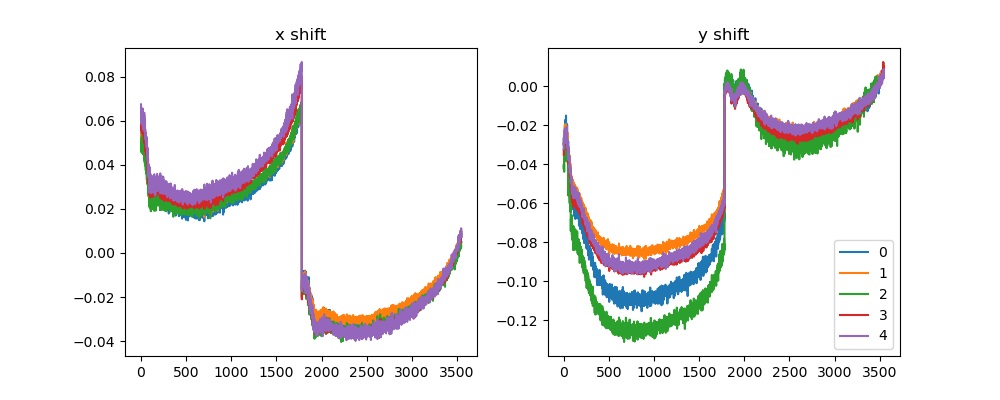

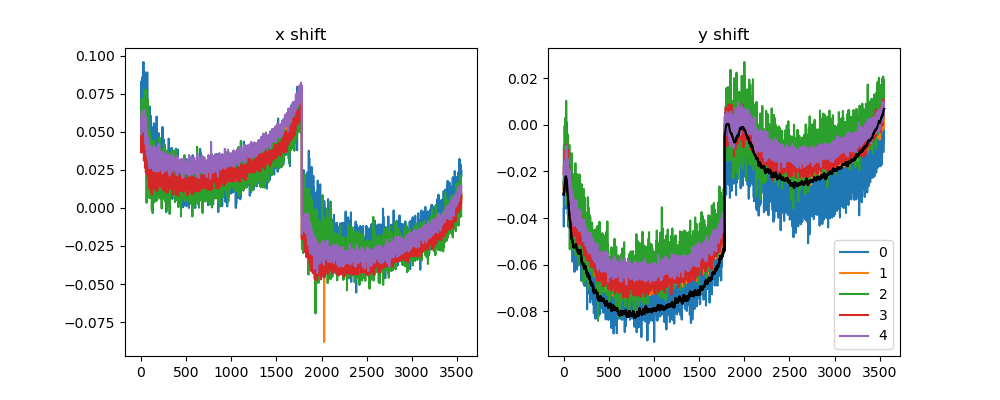

In [196]:
plt.figure(figsize=(10,4))

for i in range(5):
    #i+= 10
    plt.subplot(121)
    plt.title('x shift')
    plt.plot(shifts[:,0,mins[i]],)
    plt.subplot(122)
    plt.title('y shift')
    plt.plot(shifts[:,1,mins[i]],label=str(i))
plt.legend()

plt.figure(figsize=(10,4))

for i in range(5):
    #i+= 10
    plt.subplot(121)
    plt.title('x shift')
    plt.plot(shifts[:,0,mins2[i]],)
    plt.subplot(122)
    plt.title('y shift')
    plt.plot(shifts[:,1,mins2[i]],label=str(i))
    plt.plot(t.shift[:,1],'k')
plt.legend()


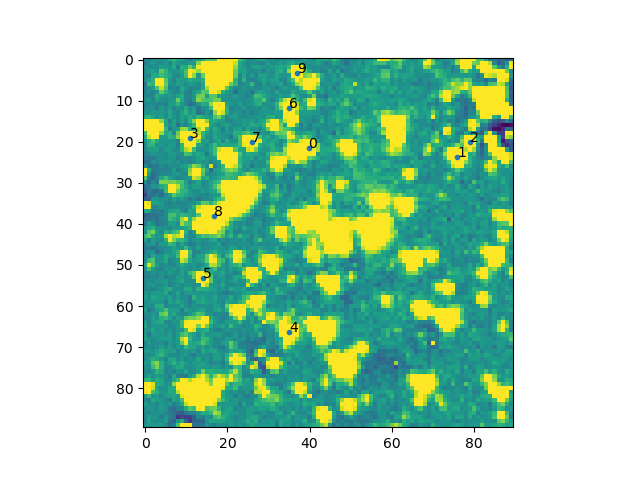

In [217]:

x = sources.xcentroid.values[mins2[:10]]
y = sources.ycentroid.values[mins2[:10]]
plt.figure()
plt.imshow(t.flux[2000],vmax=10)
plt.plot(x,y,'.')
n = np.arange(10)

for i, txt in enumerate(n):
    plt.annotate(txt, (x[i], y[i]))

In [153]:
from scipy.optimize import minimize

def min_dist(x1,y1,x2,y2):
    dx = x1[:,np.newaxis] - x2[np.newaxis,:]
    dy = y1[:,np.newaxis] - y2[np.newaxis,:]
    d = np.sqrt(dx**2 + dy**2)
    md = np.nanmin(d,axis=1)
    return md

def minimize_dist(offset,x1,y1,x2,y2,cx,cy):
    x,y = transform_coords(x1,y1,offset,cx,cy)
    mdist = min_dist(x2,y2,x,y)
    return np.nanmean(mdist) / len(mdist)

def transform_coords(x,y,param,cx,cy):
    xx = x + param[0]
    yy = y + param[1]
    xx = cx + ((xx-cx)*np.cos(param[2])-(yy-cy)*np.sin(param[2]))
    yy = cy + ((xx-cx)*np.sin(param[2])+(yy-cy)*np.cos(param[2]))
    return xx, yy

In [224]:
cx, cy = [45,45]#t.wcs.all_world2pix(202.642,50.953,0)

bounds = [[-10,10],[-10,10],[0,np.pi/2]]
x0 = [0,0,0]

catx = sources.xcentroid.values[mins[:10]]
caty = sources.ycentroid.values[mins[:10]]

sourcex = (sources.xcentroid.values+shifts[100,0,:])[mins[:10]]
sourcey = (sources.ycentroid.values+shifts[100,1,:])[mins[:10]]



In [225]:
res = minimize(minimize_dist,x0,args=(catx,caty,sourcex,sourcey,cx,cy),method='Nelder-Mead',bounds=bounds)

In [226]:
res.x

array([ 0.02755298, -0.0593708 ,  0.        ])

In [227]:
res.x

array([ 0.02755298, -0.0593708 ,  0.        ])

In [178]:
np.nanmedian(shifts[100,0,mins[:10]])

0.02907574324665596